# W2V Tutorial

## 1. Data loading

정제된 데이터셋 로딩

In [1]:
#-*-coding:utf-8
import re
corpus_path = './data/tokenized/wiki_ko_mecab.txt'

datasets = []
with open(corpus_path, 'r', encoding='utf-8') as f:
    for line in f:
        datasets.append(re.sub(r"[^ㄱ-힣a-zA-Z0-9]+", ' ', line).strip().split())

print(datasets[:1])

[['제임스', '얼', '지미', '카터', '주니어', '1', '9', '2', '4', '년', '1', '0', '월', '1', '일', '는', '민주당', '출신', '미국', '3', '9', '번', '째', '대통령', '1', '9', '7', '7', '년', '1', '9', '8', '1', '년', '이', '다', '지미', '카터', '는', '조지', '아주', '섬터', '카운티', '플', '레인스', '마을', '에서', '태어났', '다', '조지', '아', '공과', '대학교', '를', '졸업', '하', '였', '다', '그', '후', '해군', '에', '들어가', '전함', '원자력', '잠수함', '의', '승무원', '으로', '일', '하', '였', '다', '1', '9', '5', '3', '년', '미국', '해군', '대위', '로', '예편', '하', '였', '고', '이후', '땅콩', '면화', '등', '을', '가꿔', '많', '은', '돈', '을', '벌', '었', '다', '그', '의', '별명', '이', '땅콩', '농부', 'Peanut', 'Farmer', '로', '알려졌', '다', '1', '9', '6', '2', '년', '조지아', '주', '상원', '의원', '선거', '에서', '낙선', '하', '나', '그', '선거', '가', '부정', '선거', '였음을', '입증', '하', '게', '되', '어', '당선', '되', '고', '1', '9', '6', '6', '년', '조지아', '주', '지사', '선거', '에', '낙선', '하', '지만', '1', '9', '7', '0', '년', '조지아', '주', '지사', '를', '역임', '했', '다', '대통령', '이', '되', '기', '전', '조지', '아주', '상원', '의원', '을', '두', '번', '연임', '했으며', '1', '9', '7', '

## 2. Word2Vec 생성

gensim 라이브러리를 이용하여 word2vec 생성

In [2]:
from gensim.models import Word2Vec
model_name = './wiki-sg-256.wv'
model = Word2Vec(datasets, vector_size=256, workers=12, sg=1, window=5, min_count=10)
word_vectors = model.wv
word_vectors.save_word2vec_format(model_name) # 파일 저장


## 3. 평가셋을 이용하여 유사도 평가

평가셋 다운로드

In [3]:
# Windows
!curl https://raw.githubusercontent.com/dongjun-Lee/kor2vec/master/test_dataset/kor_ws353.csv > kor_ws353.csv

# Linux
# !wget https://raw.githubusercontent.com/dongjun-Lee/kor2vec/master/test_dataset/kor_ws353.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  6753  100  6753    0     0   6753      0  0:00:01 --:--:--  0:00:01 15417


평가셋 로딩 후, 정답(`answer_list`)과 각 W2V의 단어의 유사도 값(`pred_list`)을 저장

In [4]:
testset = './kor_ws353.csv'

answer_list, pred_list = [], []
with open(testset, 'r', encoding='utf-8-sig') as testfile:
    for pair in testfile:
        w1, w2, sim = pair.strip().split(',')
        try:
            pred = word_vectors.similarity(w1, w2)
            answer_list.append(float(sim))
            pred_list.append(pred)
        except KeyError as e:
            # 단어 임베딩에 포함되지 않은 단어들
            print(e)

"Key '똑똑한' not present"
"Key '똑똑한' not present"
"Key '씨디' not present"
"Key '고양이과' not present"
"Key '육식동물' not present"
"Key '정신의학' not present"
"Key '정신의학' not present"
"Key '수집품' not present"
"Key '독립체' not present"
"Key '인종차별' not present"
"Key '유사도' not present"
"Key '근접성' not present"
"Key '랍스터' not present"
"Key '랍스터' not present"
"Key '랍스터' not present"
"Key '중요성' not present"


상관관계 분석을 위해 스피어만 상관계수와 피어슨 상관계수를 계산 후 결과를 출력

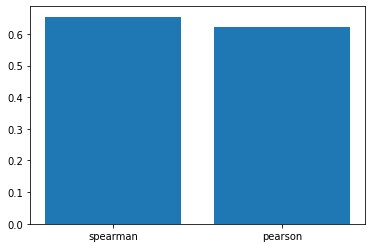

spearman: 0.65419, pearson: 0.62133


In [6]:
from scipy import stats
from matplotlib import pyplot as plt

spearman, _ = stats.spearmanr(answer_list, pred_list)
pearson, _ = stats.pearsonr(answer_list, pred_list)

label = ['spearman','pearson']
plt.bar(label, [spearman, pearson])
plt.show()
print('spearman: %.5f, pearson: %.5f' % (spearman, pearson))